## About the dataset
The dataset that I am using for this experiment is the heart disease prediction dataset. It consists of various columns/features such as age, sex, Chest Pain Type. Cholestoral level etc. and our aim would be to detect if a person has a heart disease or not based upon given data.
The dataset is available for public use on kaggle. The link to datset is - https://www.kaggle.com/ronitf/heart-disease-uci.


## Importing necessary packages

In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Reading the data

In [11]:
data = pd.read_csv("HeartDiseaseData.csv")

In [12]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Checking datatypes, missing values and renaming the columns

In [13]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
data.rename(columns={"age":"Age","sex":"Sex","cp":"ChestPainType","trestbps":"RestingBloodPressure","chol":"SerumCholestoral","fbs":"fastingBloodSugar","restecg":"RestingECGResults",
                     "thalach":"MaxHeartRate","exang":"ExerciseInducedAngina","oldpeak":"ST_Depression","slope":"Slope","ca":"ColoredVessels","thal":"Thal_level"},inplace=True)
data

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholestoral,fastingBloodSugar,RestingECGResults,MaxHeartRate,ExerciseInducedAngina,ST_Depression,Slope,ColoredVessels,Thal_level,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
# Trying to understand categorical variables
#data["ChestPainType"].value_counts()
#data["fastingBloodSugar"].value_counts() 2 categories
#data["RestingECGResults"].value_counts()# 3 categories - heart beats slowly, medium or fast
#data["ExerciseInducedAngina"].value_counts() # 2 categories only
#data["Slope"].value_counts()
data["Thal_level"].value_counts()

2    166
3    117
1     18
0      2
Name: Thal_level, dtype: int64

Encoding - Bsed upon above results, we can see that categorical Columns are ordinal i.e they have a numerical relationship between them so we will keep them like these and do not perform one- hot encoding.
Feature Selection - In this dataset, we have only limited number of features i.e 12. So, we skip thje feature selection step.

In [16]:
# Checking missing values
data.isnull().sum()

Age                      0
Sex                      0
ChestPainType            0
RestingBloodPressure     0
SerumCholestoral         0
fastingBloodSugar        0
RestingECGResults        0
MaxHeartRate             0
ExerciseInducedAngina    0
ST_Depression            0
Slope                    0
ColoredVessels           0
Thal_level               0
target                   0
dtype: int64

### Checking correlation of various features with the target class

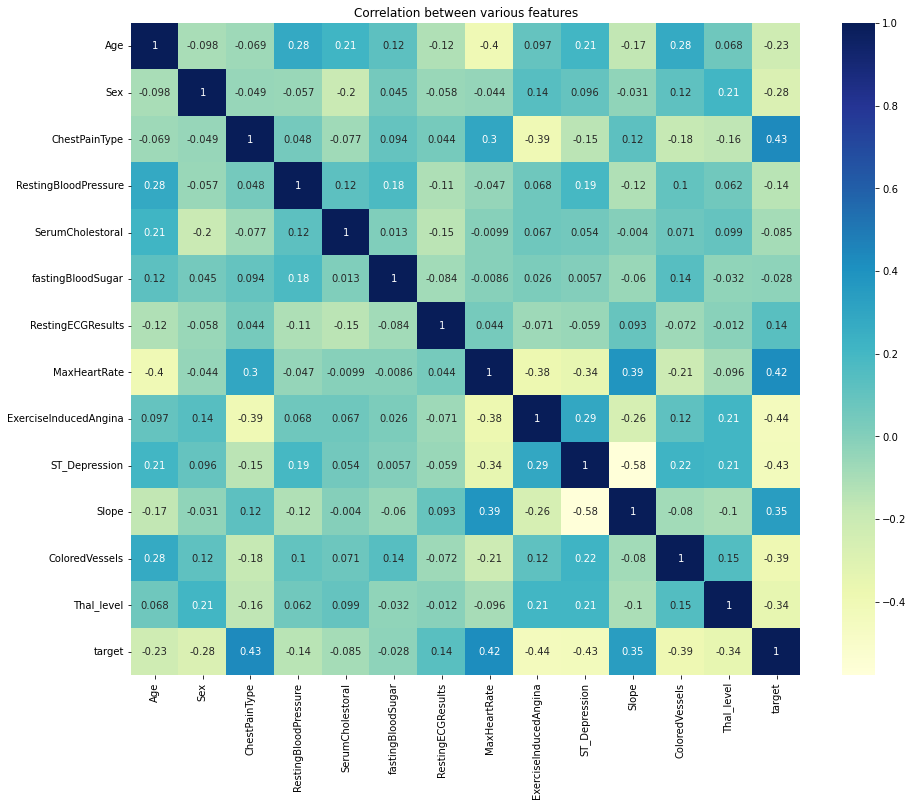

In [17]:
import seaborn as sns
fig=plt.figure(figsize=(15,12))
cor=data.corr()
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.title("Correlation between various features")
plt.show()

In [18]:
max_cor_target = abs(cor["target"])
max_cor_target

Age                      0.225439
Sex                      0.280937
ChestPainType            0.433798
RestingBloodPressure     0.144931
SerumCholestoral         0.085239
fastingBloodSugar        0.028046
RestingECGResults        0.137230
MaxHeartRate             0.421741
ExerciseInducedAngina    0.436757
ST_Depression            0.430696
Slope                    0.345877
ColoredVessels           0.391724
Thal_level               0.344029
target                   1.000000
Name: target, dtype: float64

From the above list, we can see that ExcerciseInducedAngina has the maximum correlation with the target(dependent) variable.

### Graphical Univariate analysis

Using swarmplot to visualize the relationship between ST_Depression and target variable as these have a very strong correlation with each other.

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


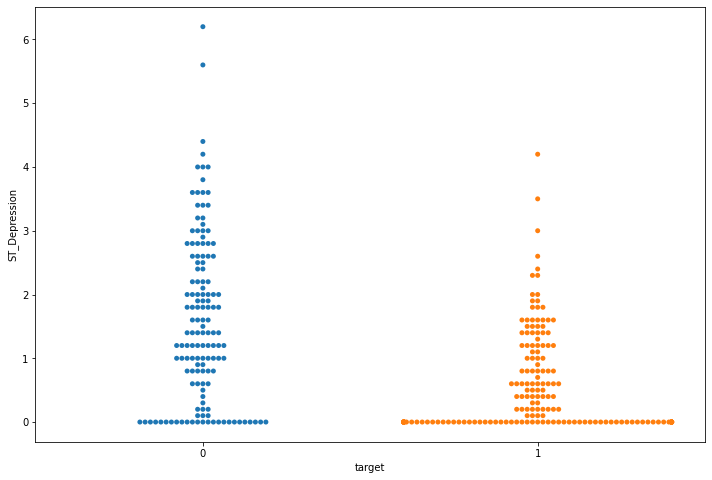

In [19]:
fig=plt.figure(figsize=(12,8))
sns.swarmplot(x=data["target"],y=data["ST_Depression"])
fig.show()

Using countplots to find frequency of each category in categorical variables.

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWar

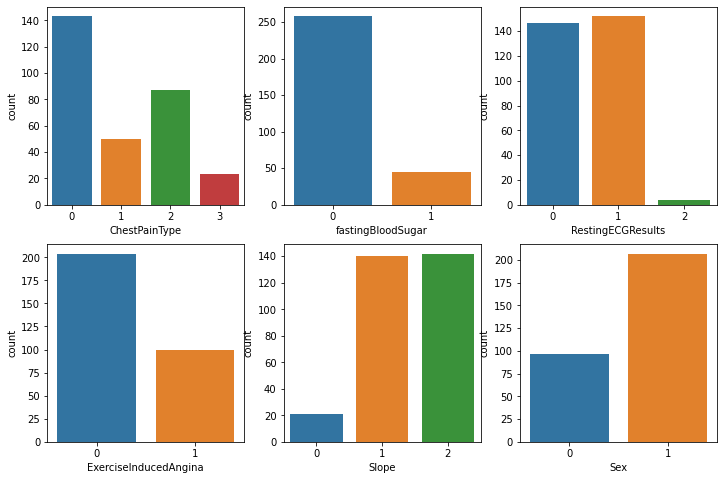

In [20]:
fig,ax = plt.subplots(2,3,figsize=(12,8))

sns.countplot(data["ChestPainType"],ax=ax[0][0])
sns.countplot(data["fastingBloodSugar"], ax=ax[0][1])
sns.countplot(data["RestingECGResults"], ax=ax[0][2])
sns.countplot(data["ExerciseInducedAngina"], ax=ax[1][0])
sns.countplot(data["Slope"], ax=ax[1][1])
sns.countplot(data["Sex"], ax=ax[1][2])

fig.show()




Using histograms for numerical data

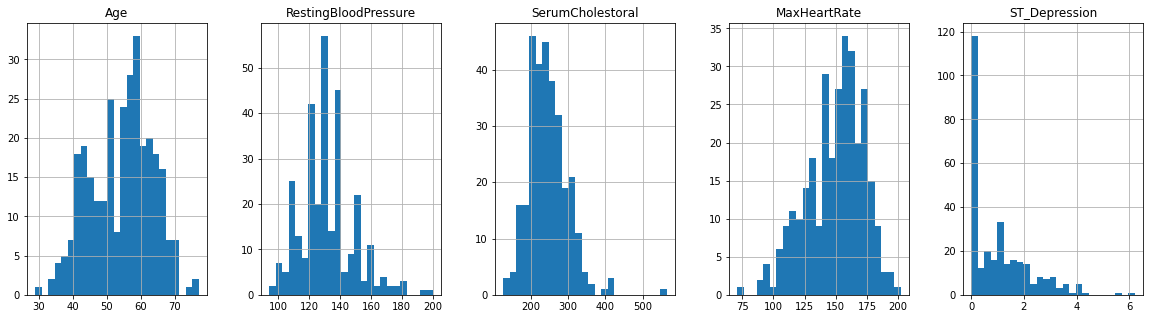

In [21]:
fig,ax = plt.subplots(1,5,figsize=(20,5))


data.hist(column="Age",bins = 25, ax=ax[0])
data.hist(column="RestingBloodPressure",bins = 25, ax=ax[1])
data.hist(column="SerumCholestoral",bins = 25, ax=ax[2])
data.hist(column="MaxHeartRate",bins = 25, ax=ax[3])
data.hist(column="ST_Depression",bins = 25, ax=ax[4])
fig.show()

Overall the above data is not that skewed except for ST_Depression. This is highly right skewed (has a tail towards right) which depicts outliers. 

From the above distributions, we can see that for Serum Cholestrol and ST_Depression are right skewed and MaxHeartRate is left skewed. This means that our dataset has more data for lower serum cholestoral and ST_Depression values and can do a better job predicting heart disease for lower serum cholestoral and ST_Depression values. This concept is similar to the impact of class imbalance. More skewed the data is, more is the number of outliers i.e samples that are different than normal data and outliers affect the performance of models.

It's not necessary to remove skew from data. Normal distributions work better with linear models but there are some models such as trees and XG boost which are not much impacted by skew in data as well. So, we will try different models for this dataset too and compare their performance.

## Scaling the data

In [22]:
df_y=data["target"]
df_x=data[["Age","Sex","ChestPainType","RestingBloodPressure","SerumCholestoral","fastingBloodSugar","RestingECGResults","MaxHeartRate","ExerciseInducedAngina","ST_Depression","Slope","ColoredVessels","Thal_level"]]

In [23]:
# Performing normalization on data. Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler

In [24]:
st_x=StandardScaler()
df_x=st_x.fit_transform(df_x)
df_x

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [25]:
#Combining the data
scaled_data=pd.DataFrame(df_x,columns=["Age","Sex","ChestPainType","RestingBloodPressure","SerumCholestoral","fastingBloodSugar","RestingECGResults","MaxHeartRate","ExerciseInducedAngina","ST_Depression","Slope","ColoredVessels","Thal_level"])
scaled_data

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholestoral,fastingBloodSugar,RestingECGResults,MaxHeartRate,ExerciseInducedAngina,ST_Depression,Slope,ColoredVessels,Thal_level
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029


In [26]:
final_data=pd.concat([scaled_data,data["target"]],axis=1)

In [27]:
final_data

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholestoral,fastingBloodSugar,RestingECGResults,MaxHeartRate,ExerciseInducedAngina,ST_Depression,Slope,ColoredVessels,Thal_level,target
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,1
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922,1
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922,1
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922,1
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.649113,-0.714429,1.123029,0
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.649113,-0.714429,1.123029,0
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,-0.649113,1.244593,1.123029,0
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,-0.649113,0.265082,1.123029,0


In [28]:
final_data.to_pickle("./pickle_file/PreprocessedHeartDataset.pkl")